   customer_id   sex  customer_age  tenure
0      9798859  Male            44      93
1     11413563  Male            36      65
2       818195  Male            35     129
3     12049009  Male            33      58
4     10083045  Male            42      88
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   20000 non-null  int64 
 1   sex           20000 non-null  object
 2   customer_age  20000 non-null  int64 
 3   tenure        20000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 625.1+ KB
None
customer_id     0
sex             0
customer_age    0
tenure          0
dtype: int64


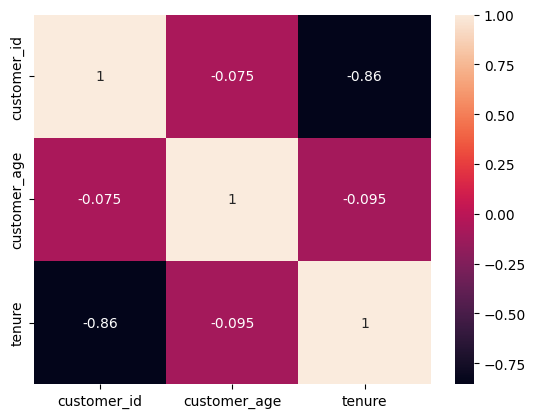

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("customer_details.csv")

print(df.head())
print(df.info())
print(df.isnull().sum())

if 'price' in df.columns:
    df['price'].plot(kind='hist', title='Price Distribution')
    plt.show()

if 'category' in df.columns:
    df['category'].value_counts().plot(kind='bar', title='Category Count')
    plt.show()

sns.heatmap(df.select_dtypes('number').corr(), annot=True)
plt.show()


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv("Churn_Modelling.csv")

# Fill missing values (if any)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# Encode categorical columns
for col in df.select_dtypes('object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Scale numeric columns
num_cols = df.select_dtypes('number').columns
df[num_cols] = StandardScaler().fit_transform(df[num_cols])

# Split features and target
X = df.drop('Exited', axis=1)  # Target column
y = df['Exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessing completed!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Preprocessing completed!
X_train shape: (8000, 13)
X_test shape: (2000, 13)


In [15]:
!pip install scikit-learn


     ---------------------------------------- 8.1/8.1 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 38.7/38.7 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 308.4/308.4 kB 2.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
